### Initial test just running a simple regression test
In this case, we won't do any feature engineering, we'll just run the linear regression model from sci-kit learn and see what we get

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

# read training values and labels
X_train = pd.read_csv('data/final/public/train_values.csv', index_col=0)
y_train = pd.read_csv('data/final/public/train_labels.csv', index_col=0)

# read test values
X_test = pd.read_csv('data/final/public/test_values.csv', index_col=0)

In [50]:
y_train.describe()

,income
count,17107.000000
mean,30.592003
std,11.302597
min,9.400000
25%,23.000000
50%,28.700000
75%,35.600000
max,151.500000


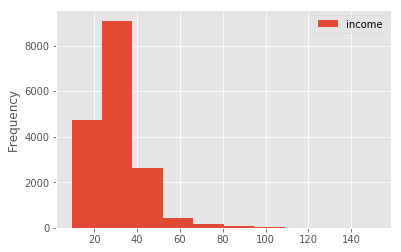

In [51]:
y_train.plot.hist()

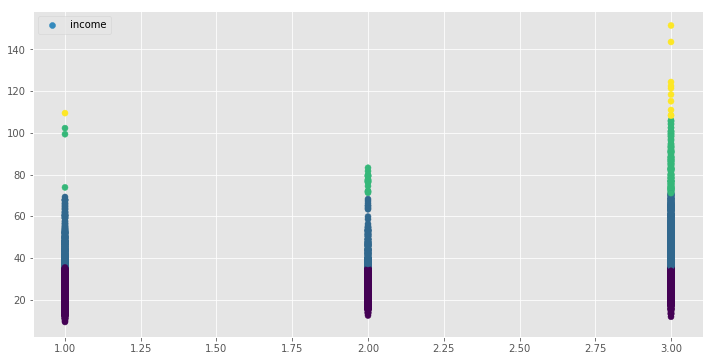

In [89]:
yrange = y_train.max() - y_train.min()
interval = yrange / 4

binnedY = np.digitize(y_train, np.array([0, interval, interval*2, interval*3]))


In [909]:
X_train['school__ownership'].value_counts()

Private for-profit    7436
Public                5488
Private nonprofit     4183
Name: school__ownership, dtype: int64

In [910]:
private_non_profit = y_train[X_train['school__ownership'] == 'Private nonprofit']
public = y_train[X_train['school__ownership'] == 'Public']
private_profit = y_train[X_train['school__ownership'] == 'Private for-profit']

print private_profit.shape[0]
print public.shape[0]
print private_non_profit.shape[0]

7436
5488
4183


In [911]:
public.describe()

,income
count,5488.000000
mean,31.298852
std,8.583190
min,13.300000
25%,26.300000
50%,29.600000
75%,34.300000
max,143.600000


In [912]:
private_profit.describe()

,income
count,7436.000000
mean,26.205836
std,9.222184
min,9.400000
25%,19.800000
50%,23.700000
75%,30.800000
max,83.300000


In [913]:
private_non_profit.describe()

,income
count,4183.000000
mean,37.461798
std,13.878329
min,11.900000
25%,28.900000
50%,35.600000
75%,43.000000
max,151.500000


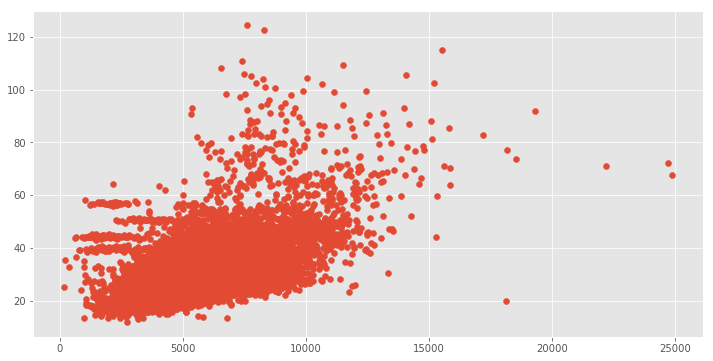

In [914]:
fig = plt.figure(figsize=(12,6))
plt.scatter(X_train['school__faculty_salary'], y_train['income'])

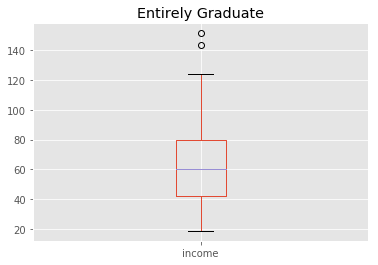

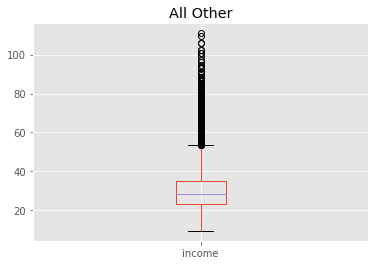

In [915]:
y_train[X_train['school__degrees_awarded_predominant'] == 'Entirely graduate-degree granting'].plot.box(title='Entirely Graduate')
y_train[X_train['school__degrees_awarded_predominant'] != 'Entirely graduate-degree granting'].plot.box(title='All Other')


In [916]:
e_graduate = y_train[X_train['school__degrees_awarded_predominant'] == 'Entirely graduate-degree granting']
other = y_train[X_train['school__degrees_awarded_predominant'] != 'Entirely graduate-degree granting']

print (e_graduate.describe())
print (other.describe())

           income
count  186.000000
mean    62.909677
std     25.329080
min     18.600000
25%     41.925000
50%     60.300000
75%     79.700000
max    151.500000
             income
count  16921.000000
mean      30.236759
std       10.513361
min        9.400000
25%       23.000000
50%       28.600000
75%       35.300000
max      111.000000


In [917]:
e_graduate = y_train[X_train['school__degrees_awarded_predominant'] == 'Entirely graduate-degree granting']
p_bachelor = y_train[X_train['school__degrees_awarded_predominant'] == 'Predominantly bachelor\'s-degree granting']

print 'Graduate: ' , e_graduate.mean()
print 'Bachelor: ', p_bachelor.mean()

Graduate:  income    62.909677
dtype: float64
Bachelor:  income    37.625128
dtype: float64


In [918]:
e_graduate.describe()

,income
count,186.000000
mean,62.909677
std,25.329080
min,18.600000
25%,41.925000
50%,60.300000
75%,79.700000
max,151.500000


In [919]:
nc = y_train[X_train['school__degrees_awarded_predominant'] == 'Not classified']
nc.describe()

,income
count,761.000000
mean,32.723127
std,12.132403
min,13.400000
25%,22.700000
50%,30.400000
75%,42.100000
max,73.000000


In [920]:
p_associate = y_train[X_train['school__degrees_awarded_predominant'] == 'Predominantly associate\'s-degree granting']
p_bachelor = y_train[X_train['school__degrees_awarded_predominant'] == 'Predominantly bachelor\'s-degree granting']

print(p_associate.describe())
print(p_bachelor.describe())

            income
count  4167.000000
mean     29.008327
std       6.969090
min      13.300000
25%      25.150000
50%      28.400000
75%      32.100000
max      83.300000
            income
count  5452.000000
mean     37.625128
std      10.747747
min      11.900000
25%      31.200000
50%      36.200000
75%      41.900000
max     111.000000


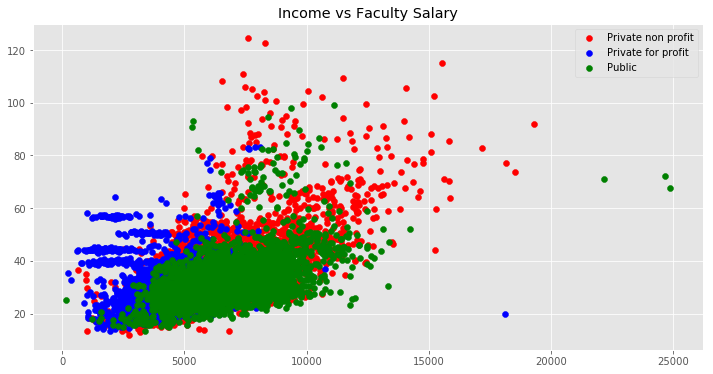

In [921]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

#series 1
x_temp = X_train[X_train['school__ownership'] == 'Private nonprofit']
y_temp = y_train[X_train['school__ownership'] == 'Private nonprofit']
ax.scatter(x_temp['school__faculty_salary'], y_temp['income'], label='Private non profit', c='r')

#series 1
x_temp = X_train[X_train['school__ownership'] == 'Private for-profit']
y_temp = y_train[X_train['school__ownership'] == 'Private for-profit']
ax.scatter(x_temp['school__faculty_salary'], y_temp['income'], label='Private for profit', c='b')

#series 1
x_temp = X_train[X_train['school__ownership'] == 'Public']
y_temp = y_train[X_train['school__ownership'] == 'Public']
ax.scatter(x_temp['school__faculty_salary'], y_temp['income'], label='Public', c='g')


ax.set_title('Income vs Faculty Salary')

ax.legend()

# FEATURE ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')


# read training values and labels
X = pd.read_csv('data/final/public/train_values.csv', index_col=0)
Y = pd.read_csv('data/final/public/train_labels.csv', index_col=0)

In [3]:
#return a formatted percentage from a fraction
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")


In [4]:
def showCorrMatrix(df):
    # admissions
    matrix = df.corr()
    
    print (matrix)
    
    plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = [i for i in range(len(df.columns))]
    plt.xticks(tick_marks, df.columns, rotation='vertical')
    plt.yticks(tick_marks, df.columns)

    plt.show()

In [47]:
X['income'] =  np.log(Y['income'])
filter_col = [col for col in X if col.startswith('admissions')]
filter_col.remove('admissions__sat_scores_average_by_ope_id')
filter_col.remove('admissions__act_scores_midpoint_cumulative')

X_new = X.drop(filter_col, axis=1)

X_numeric = X_new.select_dtypes(include=[np.number])
corr_results = pd.DataFrame()
corr_results['feature'] = X_numeric.columns
corr_results['corr'] = np.zeros(X_numeric.shape[1])


for x in range(X_numeric.shape[1]):
    corr_results.iloc[x, 1] = X['income'].corr(X_numeric.iloc[:,x])
    
import math
corr_results['abs'] = corr_results['corr'].apply(lambda x: math.fabs(x))

print (corr_results[corr_results['abs'] >= 0.5].shape)
corr_results[corr_results['abs'] >= 0.5].sort_values(by='abs', ascending=False)


(10, 3)


,feature,corr,abs
265,income,1.000000,1.000000
241,school__degrees_awarded_predominant_recoded,0.598205,0.598205
242,school__faculty_salary,0.545972,0.545972
229,admissions__sat_scores_average_by_ope_id,0.534208,0.534208
228,admissions__act_scores_midpoint_cumulative,0.531301,0.531301
260,student__share_firstgeneration_parents_highschool,-0.518081,0.518081
215,academics__program_percentage_personal_culinary,-0.513385,0.513385
249,student__demographics_first_generation,-0.511933,0.511933
259,student__share_firstgeneration,-0.511933,0.511933
262,student__share_firstgeneration_parents_somecol...,0.501280,0.501280


In [ ]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer

categorical = X.select_dtypes(exclude=[np.number])
X_new = pd.get_dummies(X,columns=categorical.columns)

imputer = Imputer(strategy='median')
X_new = imputer.fit_transform(X_new)

scaler = RobustScaler()
X_new = scaler.fit_transform(X_new)

X_iso = Isomap(n_components=2).fit_transform(X_new)

fig = plt.figure(figsize=(12,6))
plt.scatter(X_iso.iloc[:,0], X_iso.iloc[:,1])
plt.show()

### ADMISSION COLUMNS

In [925]:
def removeAdmissions(df):    
    filter_col = [col for col in df if col.startswith('admissions')]
    filter_col.remove('admissions__sat_scores_average_overall')    
    df = df.drop(filter_col, axis=1)
    return df

filter = [col for col in X if col.startswith('admissions')]
admissions = X.loc[:, filter]

percentage(admissions.count()-1, admissions.shape[0]-1)


admissions__act_scores_25th_percentile_cumulative          21.6%
admissions__act_scores_25th_percentile_english             18.3%
admissions__act_scores_25th_percentile_math                18.3%
admissions__act_scores_25th_percentile_writing              2.5%
admissions__act_scores_75th_percentile_cumulative          21.6%
admissions__act_scores_75th_percentile_english             18.3%
admissions__act_scores_75th_percentile_math                18.3%
admissions__act_scores_75th_percentile_writing              2.5%
admissions__act_scores_midpoint_cumulative                 21.6%
admissions__act_scores_midpoint_english                    18.3%
admissions__act_scores_midpoint_math                       18.3%
admissions__act_scores_midpoint_writing                     2.5%
admissions__admission_rate_by_ope_id                       43.7%
admissions__admission_rate_overall                         39.0%
admissions__sat_scores_25th_percentile_critical_reading    20.9%
admissions__sat_scores_25

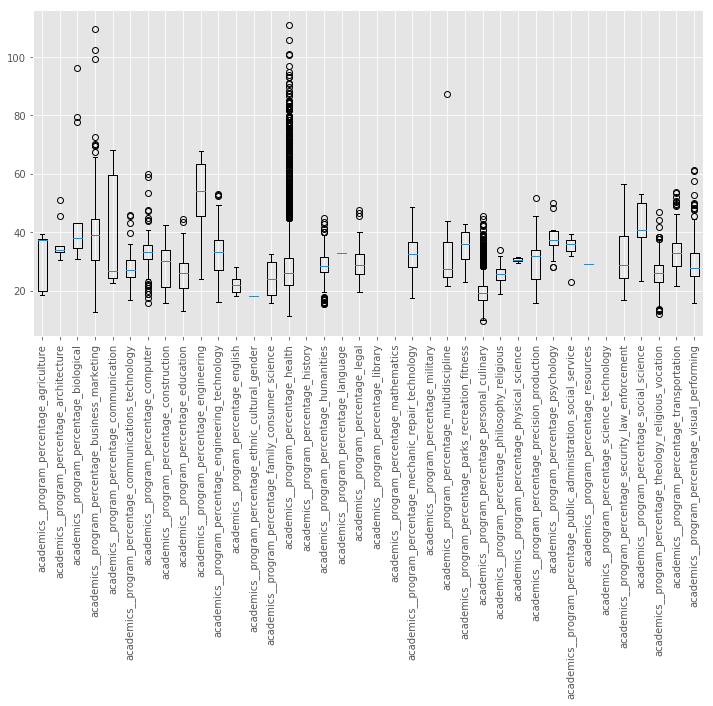

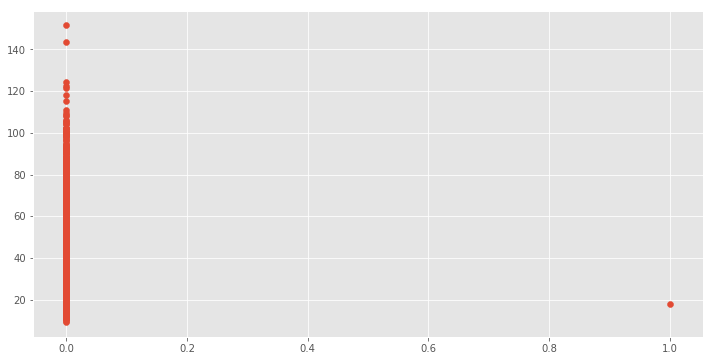

,academics__program_percentage_agriculture,academics__program_percentage_architecture,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_communications_technology,academics__program_percentage_computer,academics__program_percentage_construction,academics__program_percentage_education,academics__program_percentage_engineering,...,academics__program_percentage_psychology,academics__program_percentage_public_administration_social_service,academics__program_percentage_resources,academics__program_percentage_science_technology,academics__program_percentage_security_law_enforcement,academics__program_percentage_social_science,academics__program_percentage_theology_religious_vocation,academics__program_percentage_transportation,academics__program_percentage_visual_performing,income
row_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46.9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26.7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41.6
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34.3


In [926]:
def removeAcademics(df):
    # remove redundant academics features
    filter_col = [col for col in df if col.startswith('academics')]
    filter_col = [col for col in filter_col if "percentage" not in col]
    df = df.drop(filter_col, axis=1)   
    df = df.applymap(lambda x: 1 if x >= 0.5 else 0)

    return df

filter = [col for col in X if col.startswith('academics')]
academics = X.loc[:, filter]
academics = removeAcademics(academics)
academics['income'] = Y['income']

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

income_values = []
for x in academics.columns[:-1]:
    income_values.append(academics[academics[x] > 0.5]['income'])


ax.boxplot(income_values)
ax.set_xticklabels(academics.columns[:-1])
plt.xticks(rotation=90)
plt.show()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.scatter(academics['academics__program_percentage_ethnic_cultural_gender'],academics['income'])
plt.show()

academics.head(5)